In [15]:
import mdtraj as md
import pickle
import numpy as np
imprt urllib

In [81]:
traj0 = traj.atom_slice(traj.topology.select('(chainid 0) and (mass > 2) and resSeq 192 to 315'))
traj1 = traj.atom_slice(traj.topology.select('(chainid 0) and (mass > 2) and resSeq 192 to 315'))
traj2 = traj.atom_slice(traj.topology.select('(chainid 0) and (mass > 2) and resSeq 192 to 315'))
traj3 = traj.atom_slice(traj.topology.select('(chainid 0) and (mass > 2) and resSeq 192 to 315'))
traj4 = traj.atom_slice(traj.topology.select('(chainid 0) and (mass > 2) and resSeq 192 to 315'))
traj4.superpose(traj0)
traj3.superpose(traj0)
traj2.superpose(traj0)
traj1.superpose(traj0)

<mdtraj.Trajectory with 1 frames, 1008 atoms, 124 residues, and unitcells at 0x7f82565a99e8>

In [19]:
traj = md.load('4HFE.pdb')

In [44]:
pdbs = ['4HFE','4HFI','4NPQ','5NJY','4QH5','4QH4','4QH1','4LML','4LMK','4LMJ','4IRE','4ILC','4ILB','4IL9','4IL4','4HFH','3UUB','3TLW','3TLV','2XQA',]

In [45]:
create_tica_cluster_data()

{'2XQA': [16, 3, 3, 16, 17],
 '3TLV': [1, 1, 1, 18, 1],
 '3TLW': [13, 13, 13, 13, 13],
 '3UUB': [7, 7, 7, 7, 7],
 '4HFE': [7, 7, 7, 7, 7],
 '4HFH': [7, 7, 7, 7, 7],
 '4HFI': [7, 7, 7, 7, 7],
 '4IL4': [7, 7, 7, 7, 7],
 '4IL9': [7, 7, 7, 7, 7],
 '4ILB': [7, 7, 7, 7, 7],
 '4ILC': [7, 7, 7, 7, 7],
 '4IRE': [7, 7, 7, 7, 7],
 '4LMJ': [6, 6, 6, 6, 6],
 '4LMK': [2, 2, 2, 2, 2],
 '4LML': [16, 16, 16, 16, 16],
 '4NPQ': [7, 7, 7, 7, 7],
 '4QH1': [7, 7, 7, 7, 7],
 '4QH4': [7, 7, 7, 7, 7],
 '4QH5': [7, 7, 7, 7, 7],
 '5NJY': [11, 11, 11, 11, 11]}

In [42]:
def create_tica_cluster_data():
    def append_tica_cluster_data(pdb):
        traj = md.load(pdb + '.pdb')
        traj_cluster_data = []
        for subunit in range(0,5):
            sliced_traj = traj.atom_slice(traj.topology.select('(mass > 2) and (resSeq 192 to 315) and chainid ' + str(subunit)))
            diheds = featurizer.transform(sliced_traj)
            scaled_diheds = scaler.transform(diheds)
            tica_trajs = tica_model.transform(scaled_diheds)
            label = cluster.predict(np.asarray(tica_trajs).ravel().reshape(int(np.asarray(tica_trajs).ravel().shape[0]/tica_model.n_components),tica_model.n_components))
            traj_cluster_data.append(label)
        cluster_data[pdb] = (list(np.asarray(traj_cluster_data).reshape(5,traj.n_frames).T.ravel()))
    cluster_data = {}
    featurizer = pickle.load(open('pdc/msm/F238L_subunit/featurizer_F238L_tmd.pickle','rb'))
    scaler = pickle.load(open('pdc/msm/F238L_subunit/scaler_F238L_tmd.pickle','rb'))
    tica_model = pickle.load(open('pdc/msm/F238L_subunit/tica_model_F238L_tmd.pickle','rb'))
    cluster = pickle.load(open('pdc/msm/F238L_subunit/F238L_tmd_cluster.pickle','rb'))
    for pdb in pdbs:
        urllib.request.urlretrieve('https://files.rcsb.org/download/' + pdb + '.pdb',pdb + '.pdb')
        try:
            append_tica_cluster_data(pdb)
        except:
            print(pdb + ' not working')
    return cluster_data

In [52]:
traj = md.load('pdc/msm/F238L/xtc/4HFI_F238L_pH46_md4/4HFI_F238L_pH46_md4.tmd.intersubunit_01.xtc',top='pdc/msm/F238L/xtc/4HFI_F238L_pH46_md4/4HFI_F238L_pH46_md4.tmd.intersubunit.pdb')

In [56]:
with open('pdc/msm/F238L/xtc/4HFI_F238L_pH46_md4/pdblist.txt', 'w') as file:
    for time in range(0,traj.n_frames):
        traj[time].save_pdb('pdc/msm/F238L/xtc/4HFI_F238L_pH46_md4/mdpocket_'+ str(time) +'.pdb')
        file.write('mdpocket_'+ str(time) + '.pdb' + '\n')
    file.close()

In [92]:
traj = md.load('/media/scottzhuang/data/MD/md_prep/4NPQ_pH70_md8/ca.protein.pdb')

In [102]:
traj0 = traj.atom_slice(traj.topology.select('(chainid 0)'))
traj1 = traj.atom_slice(traj.topology.select('(chainid 1)'))
traj2 = traj.atom_slice(traj.topology.select('(chainid 2)'))
traj3 = traj.atom_slice(traj.topology.select('(chainid 3)'))
traj4 = traj.atom_slice(traj.topology.select('(chainid 4)'))
traj2prime = traj2
traj2 = traj2.superpose(traj0)
traj0prime = traj2
traj2 = traj2.superpose(traj3)
traj3prime = traj2
traj2 = traj2.superpose(traj1)
traj1prime =traj2
traj2 =traj2.superpose(traj4)
traj4prime = traj2

In [94]:
traj.xyz = np.concatenate((traj0prime.xyz,traj1prime.xyz,traj2prime.xyz,traj3prime.xyz,traj4prime.xyz), axis=1)

In [95]:
traj.save_pdb('/media/scottzhuang/data/MD/md_prep/4NPQ_pH70_md8/ca.fromchain2.protein.pdb')

In [84]:
traj0prime.save_pdb('/media/scottzhuang/data/MD/md_prep/4NPQ_pH70_md8/ca.chain0.protein.pdb')
traj1prime.save_pdb('/media/scottzhuang/data/MD/md_prep/4NPQ_pH70_md8/ca.chain1.protein.pdb')
traj2.save_pdb('/media/scottzhuang/data/MD/md_prep/4NPQ_pH70_md8/ca.chain2.protein.pdb')
traj3prime.save_pdb('/media/scottzhuang/data/MD/md_prep/4NPQ_pH70_md8/ca.chain3.protein.pdb')
traj4prime.save_pdb('/media/scottzhuang/data/MD/md_prep/4NPQ_pH70_md8/ca.chain4.protein.pdb')


In [85]:
md.rmsd(traj0prime,traj0)

array([ 0.18429929], dtype=float32)

In [ ]:
md_data = pd.read_pickle()

In [1]:
from __future__ import print_function
%matplotlib inline
import mdtraj as md
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy
from scipy.spatial.distance import squareform
import pandas as pd
import matplotlib.gridspec as gridspec
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')
import MDAnalysis as mda
from statistics import mode
import ast
import msmexplorer as msme
from msmbuilder.utils import load,dump
import itertools
from msmbuilder.featurizer import ContactFeaturizer
from msmbuilder.featurizer import DihedralFeaturizer
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
#XRD Ensemble
#28 4NPQ
#18 4HFI

In [51]:
sns.set(style="whitegrid")

In [2]:
import seaborn as sns

In [3]:
md_data_235 = pd.read_pickle('masterthesis/glic_activation_open_235.pickle')

In [4]:
md_data_235['235_hydration_state'] = md_data_235.system % 2 + 1

In [5]:
md_data_235['new_sys'] = md_data_235.system - md_data_235.system % 2

In [6]:
import ptitprince as pt

In [9]:
sns.set(style="whitegrid",font_scale=1)
import matplotlib.collections as clt

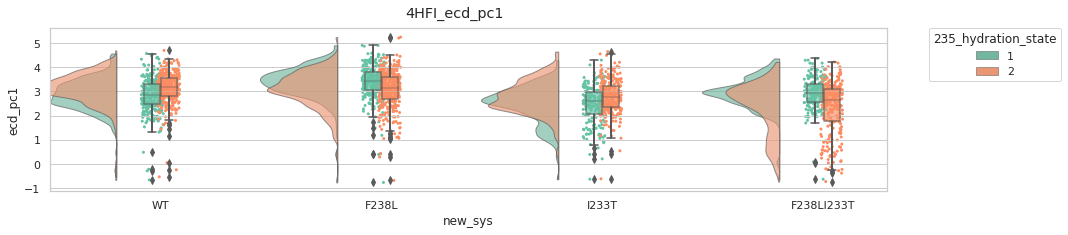

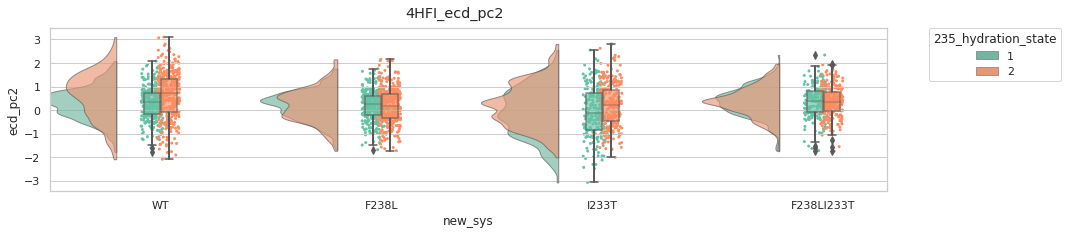

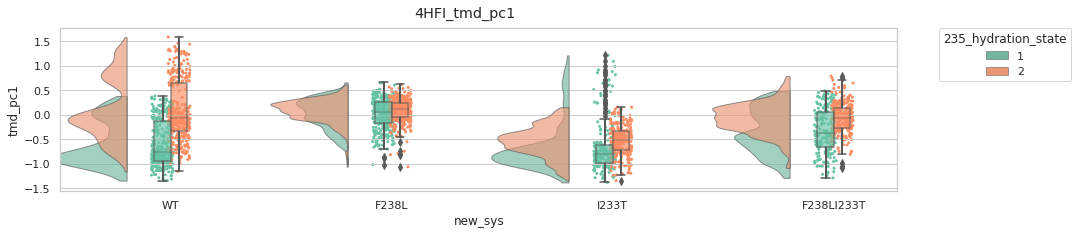

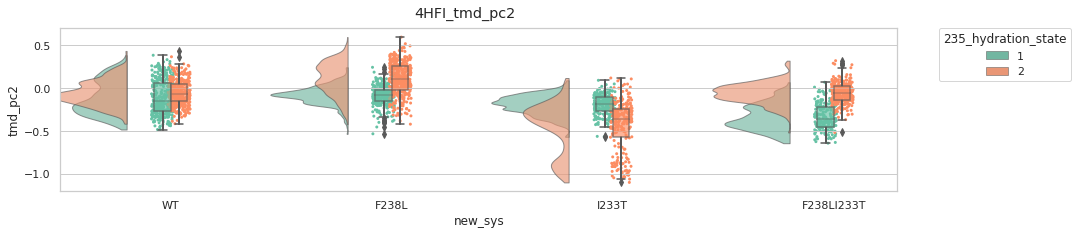

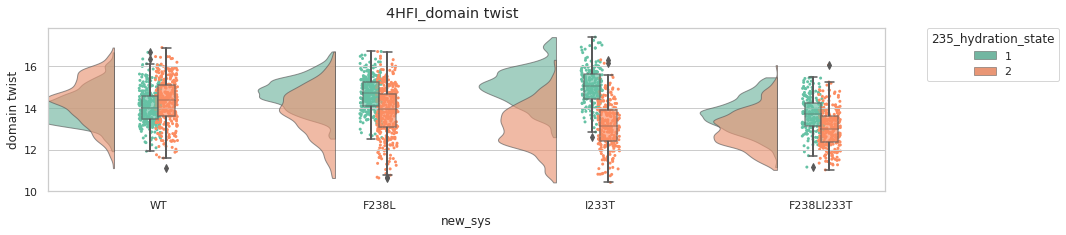

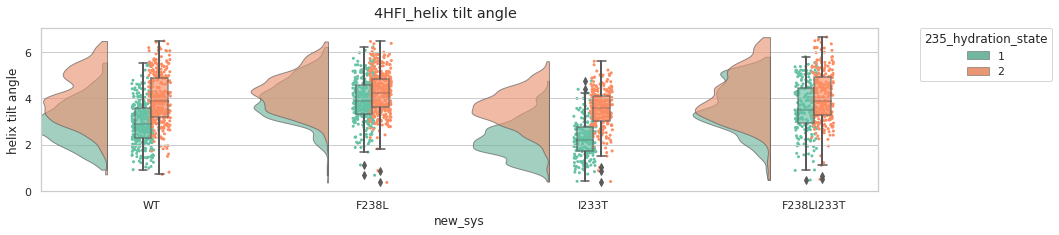

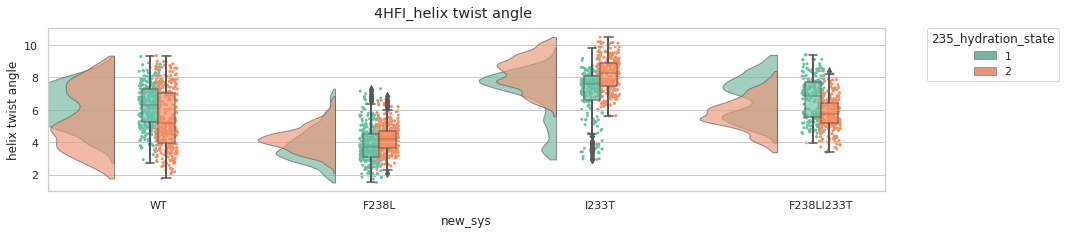

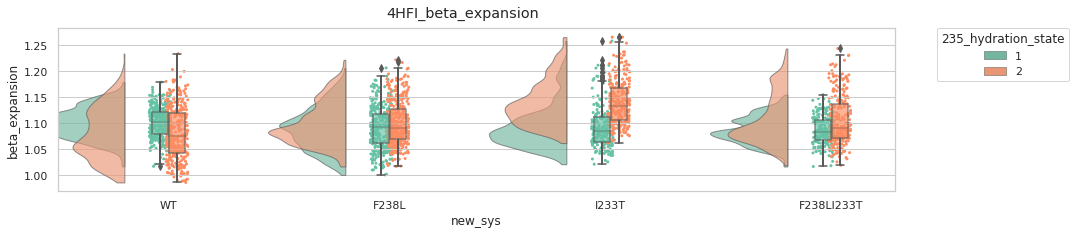

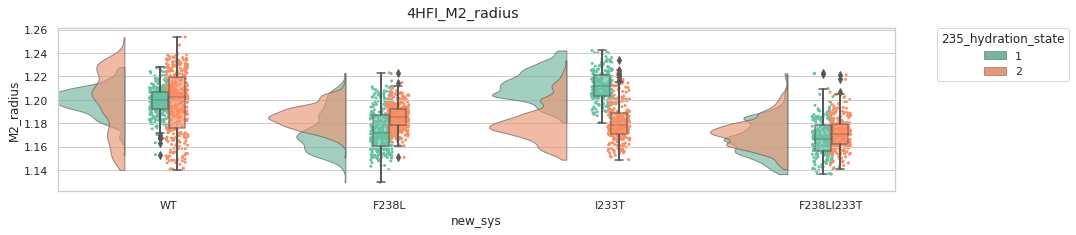

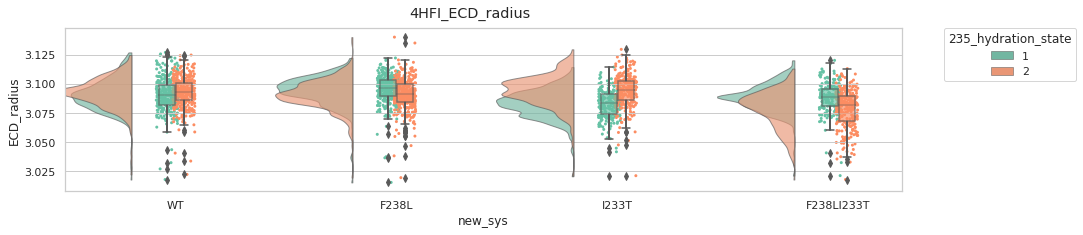

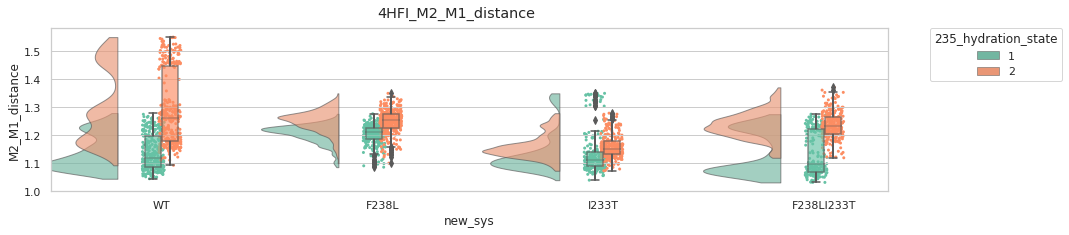

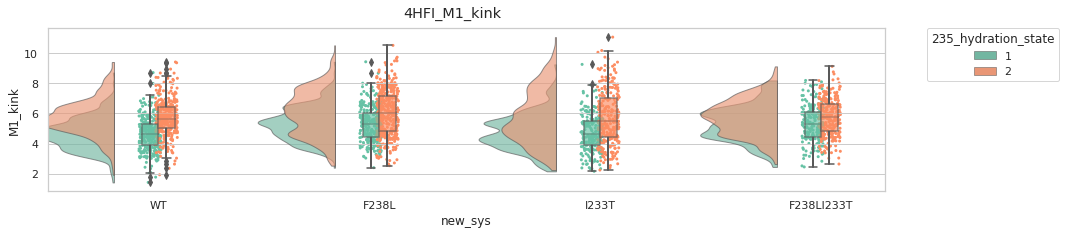

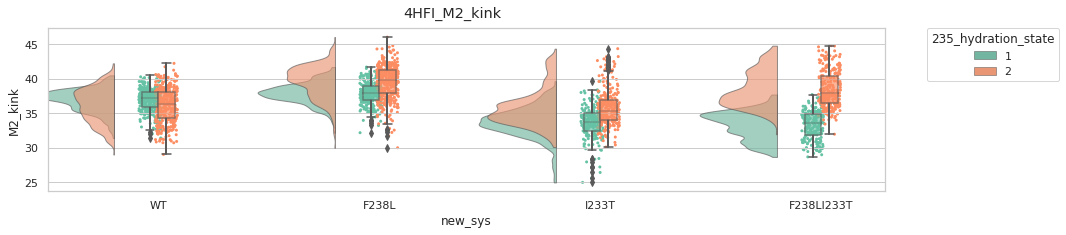

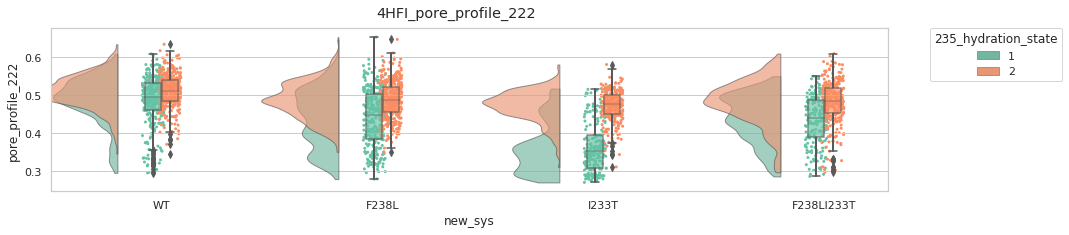

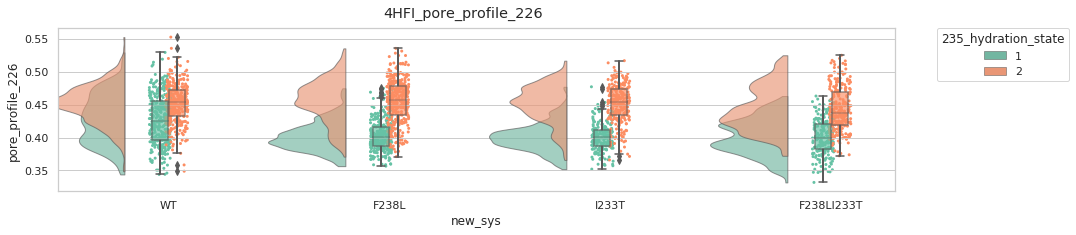

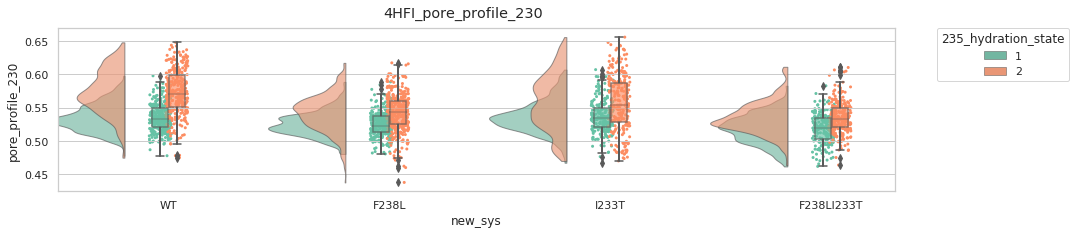

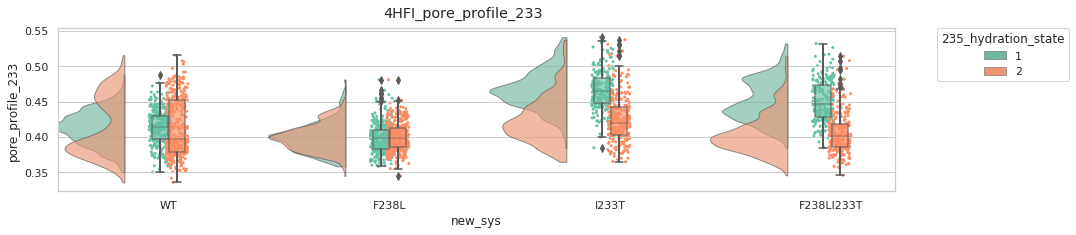

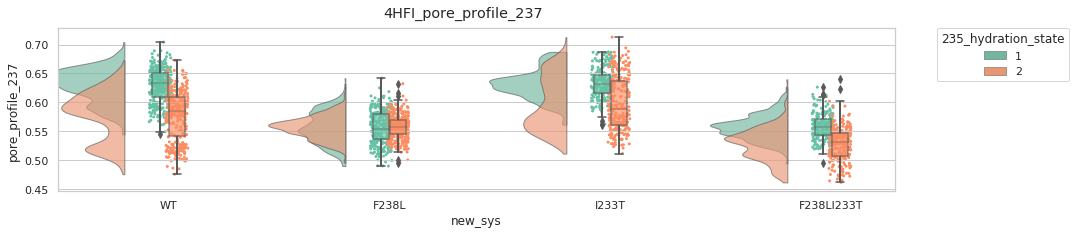

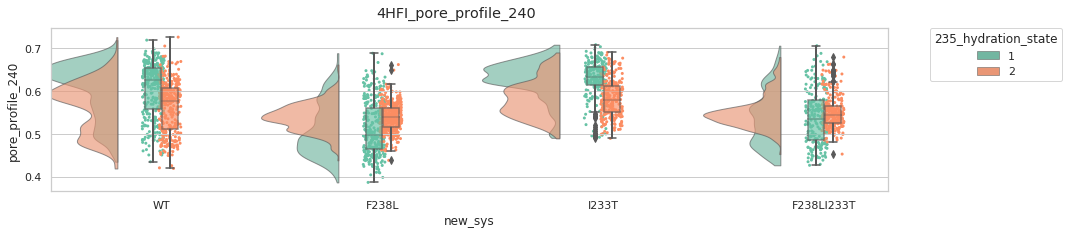

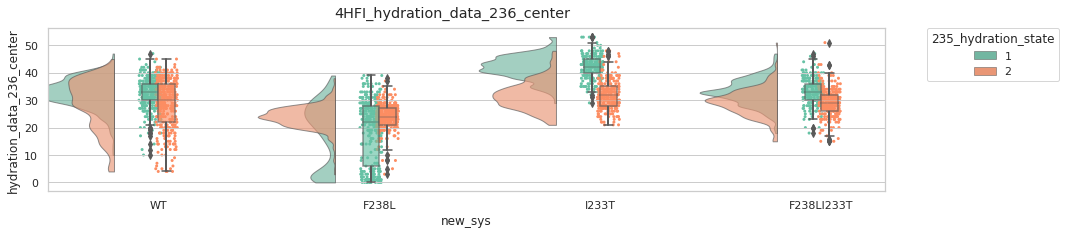

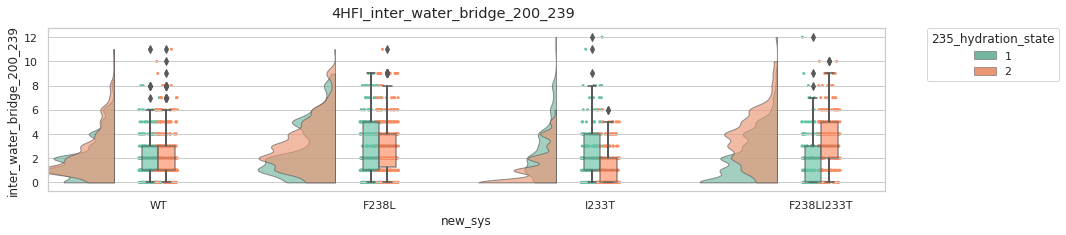

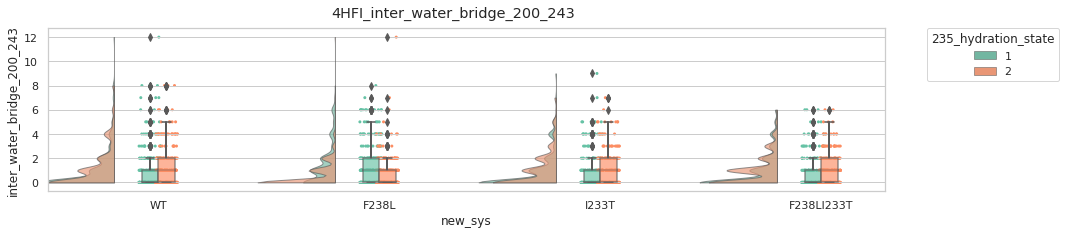

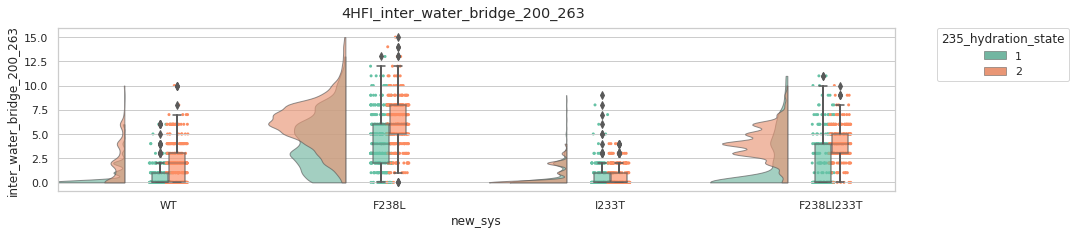

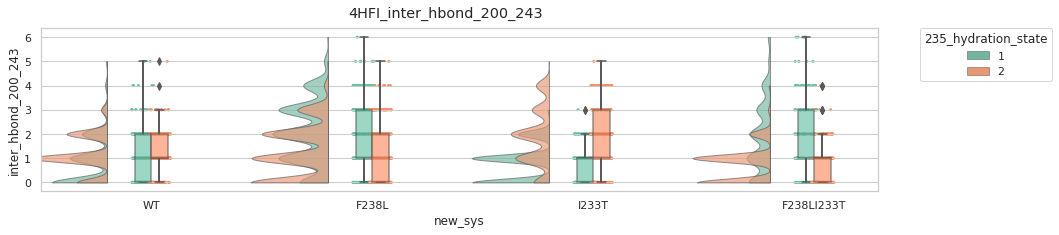

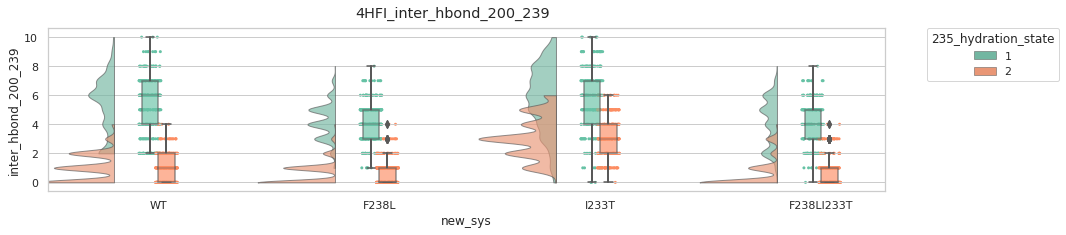

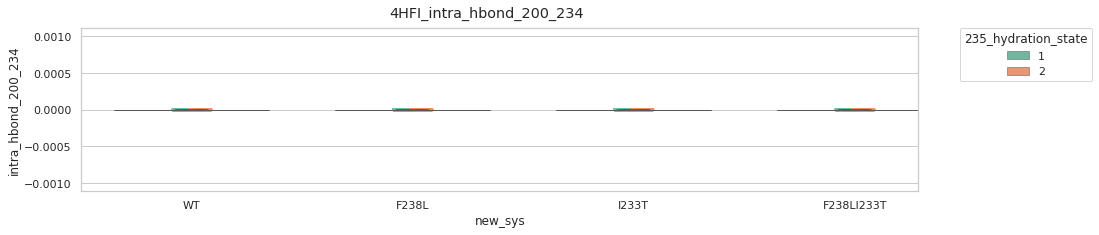

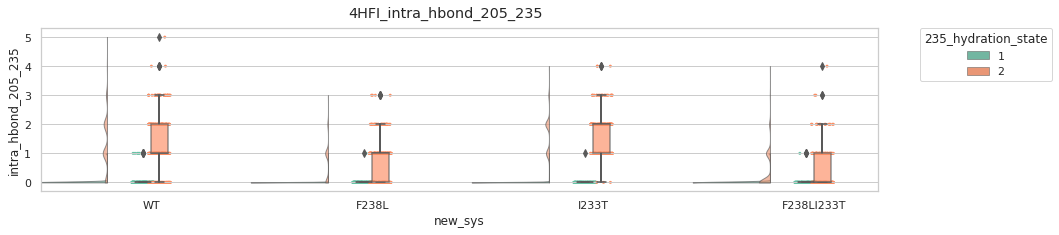

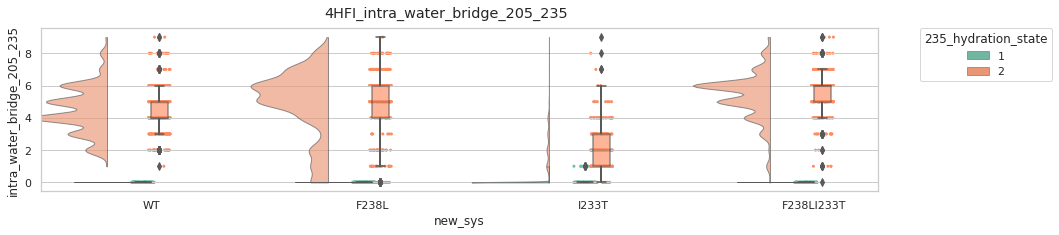

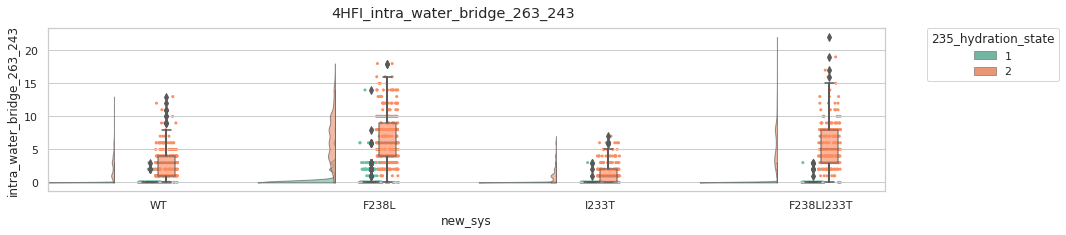

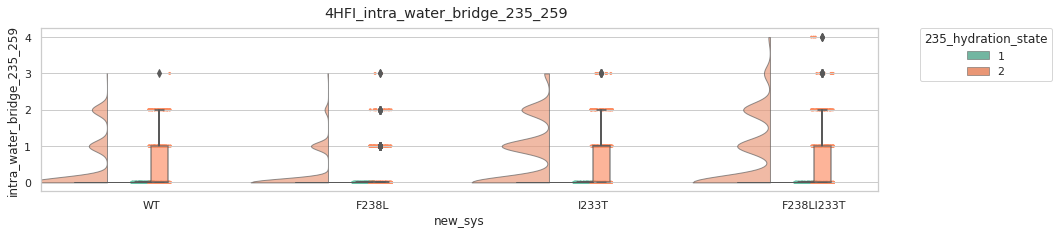

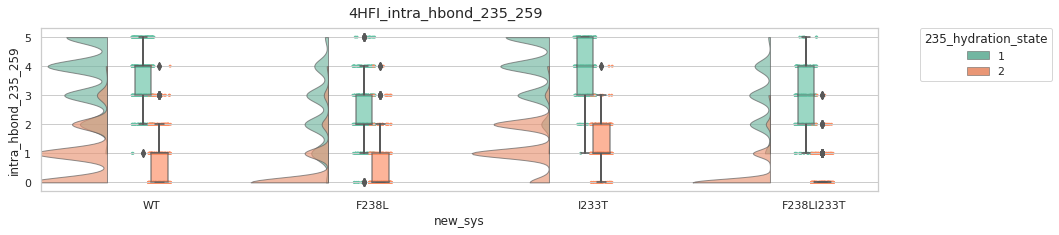

In [22]:
for feature in md_data_235.columns[11:-2]:
    fig, ax = plt.subplots(figsize=(15, 3))
    fig.suptitle('4HFI_' + feature)
    pt.RainCloud(x = 'new_sys', y = feature, hue = '235_hydration_state', data = md_data_235,  
        palette = 'Set2', bw = .2,width_viol = .7,ax=ax,alpha = .65,dodge = True)
#    group = md_data_235.groupby(['system'],sort=False)[feature]
#    mean = group.mean()
#    errors = group.sem()
#    mean.plot.bar(yerr=errors,ax=ax)
    ax.set_xticklabels(['WT','F238L','I233T','F238LI233T'])


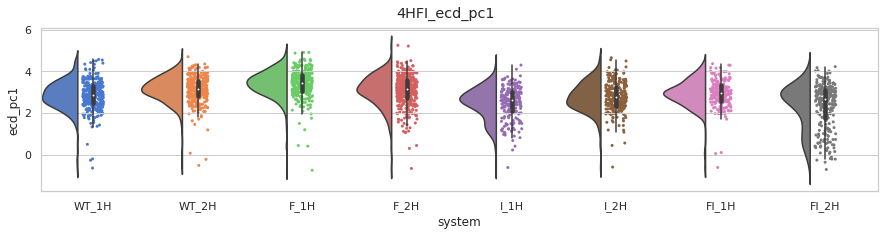

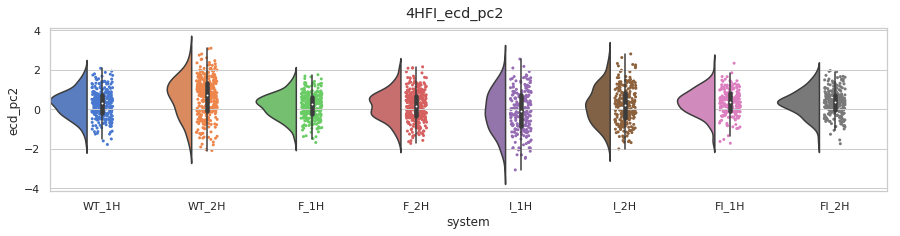

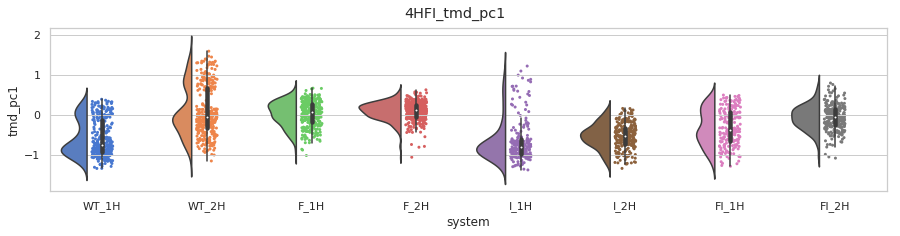

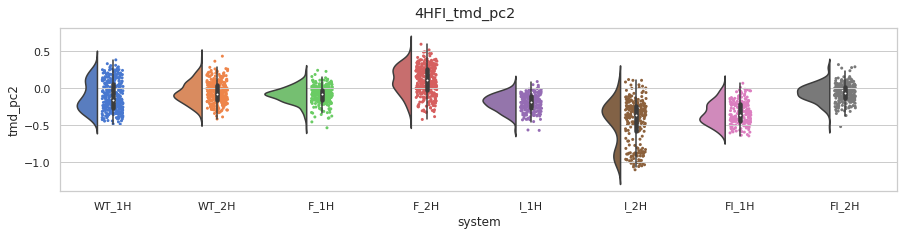

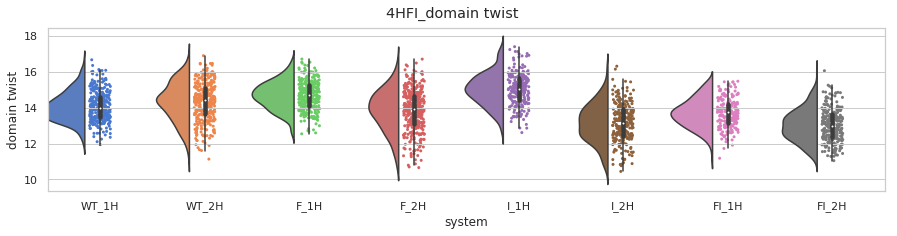

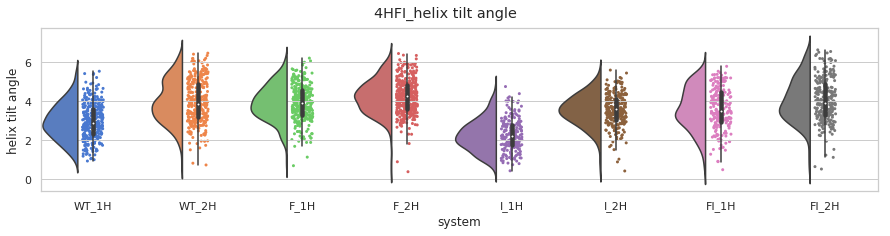

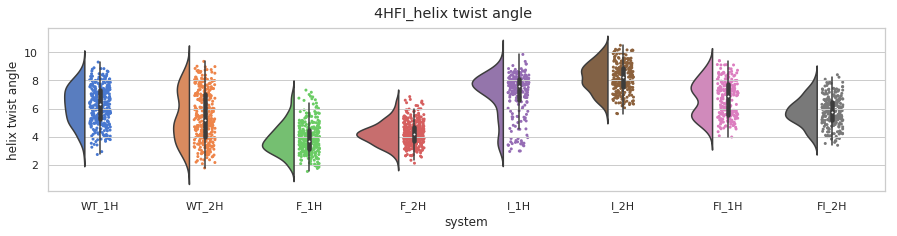

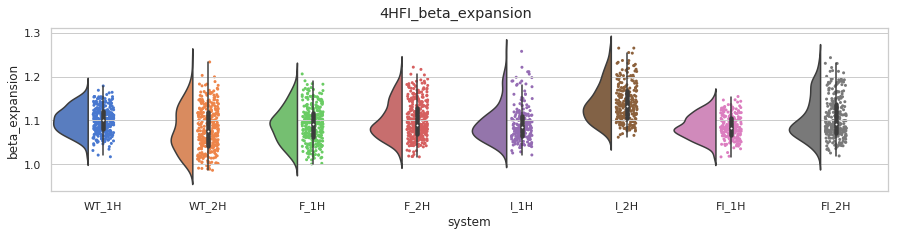

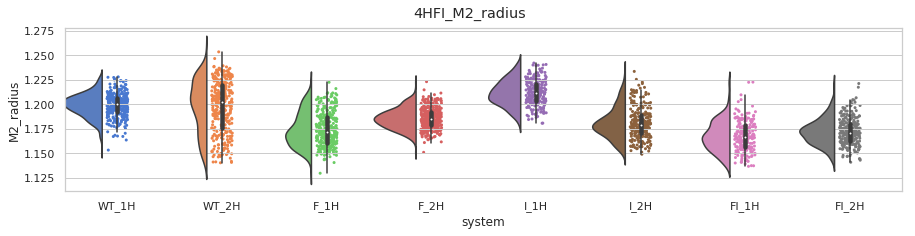

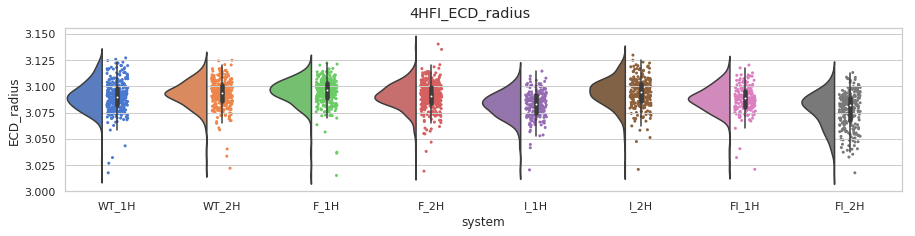

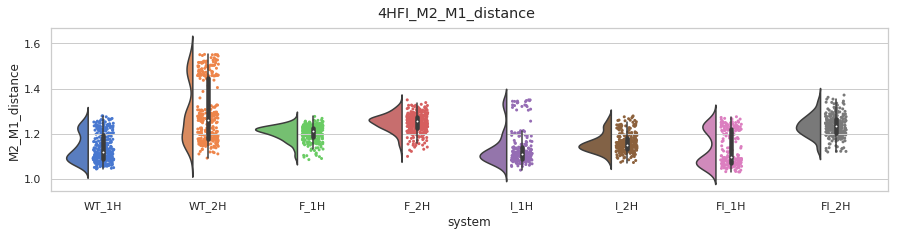

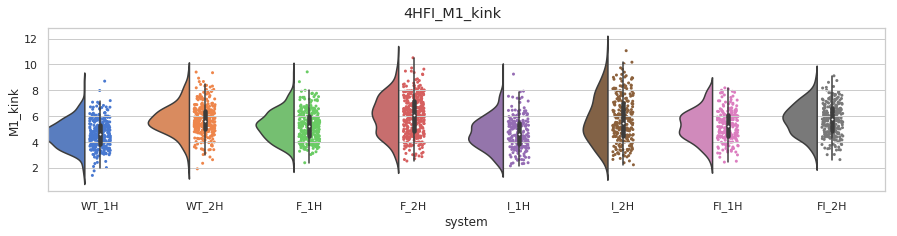

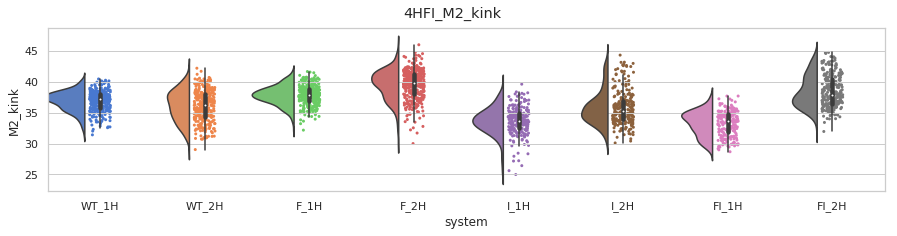

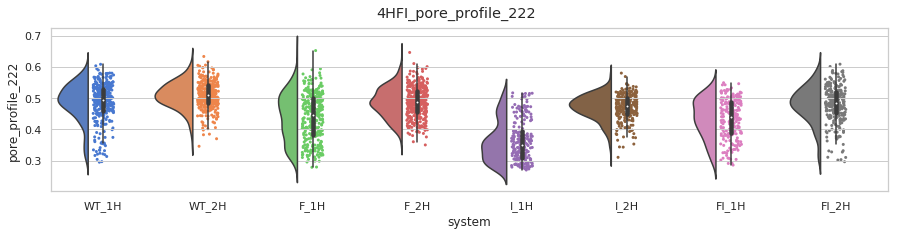

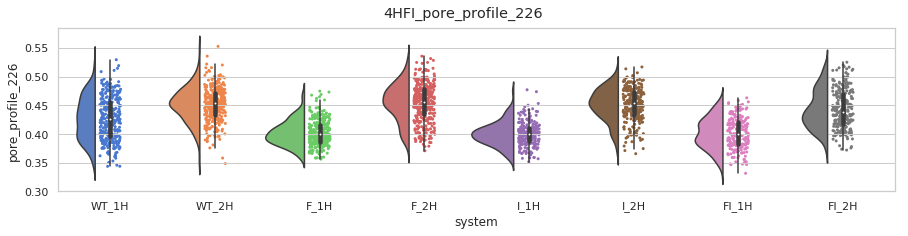

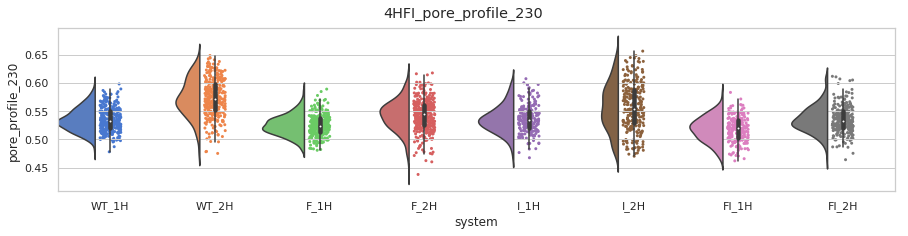

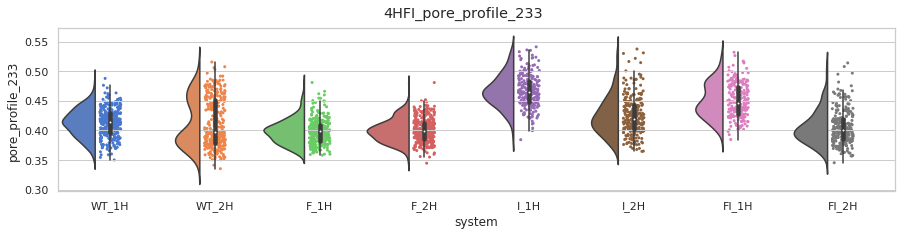

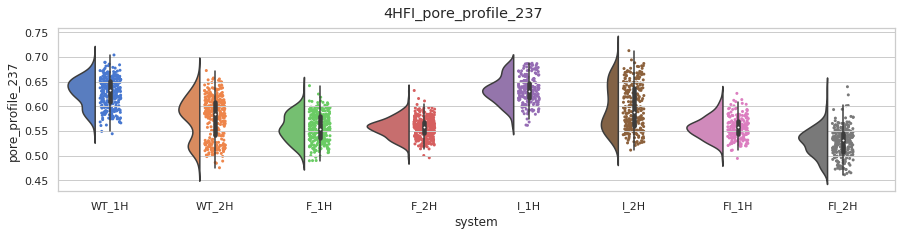

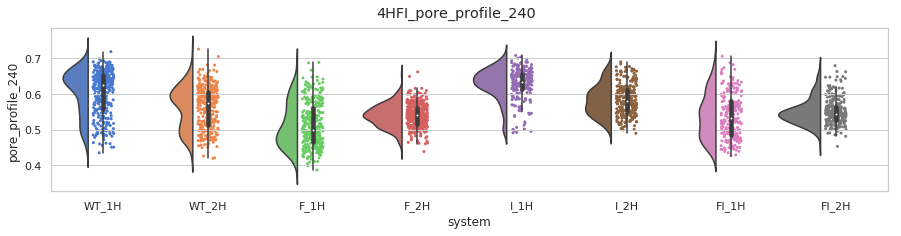

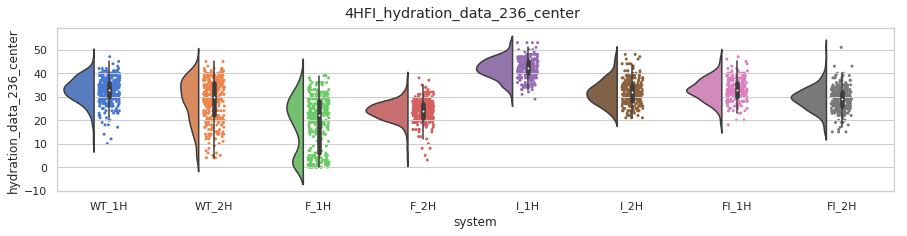

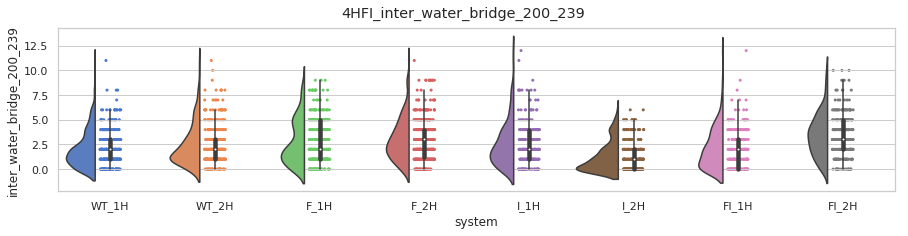

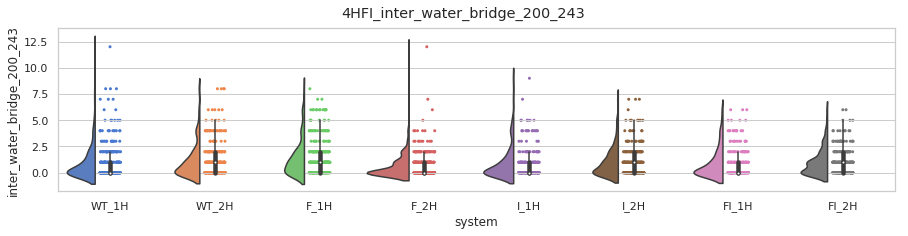

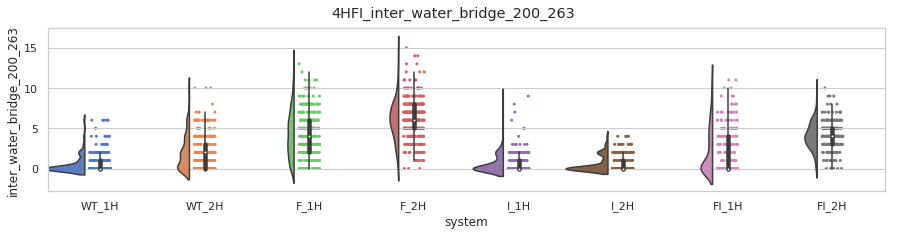

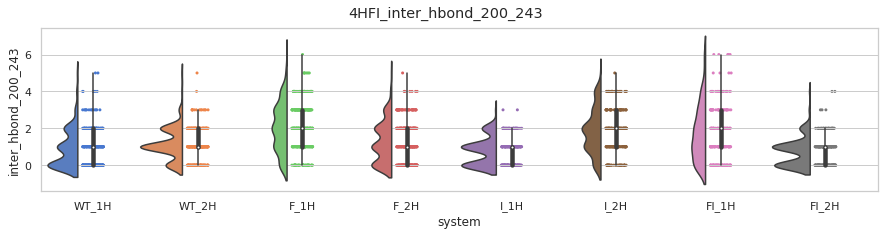

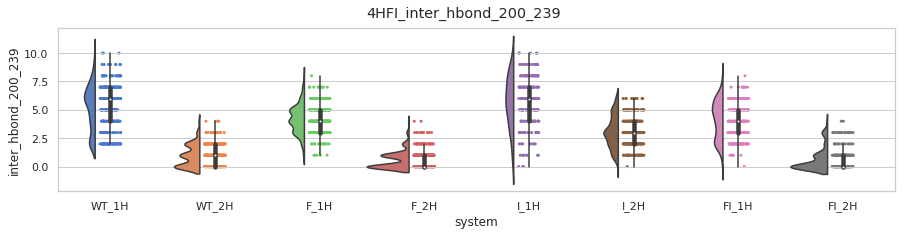

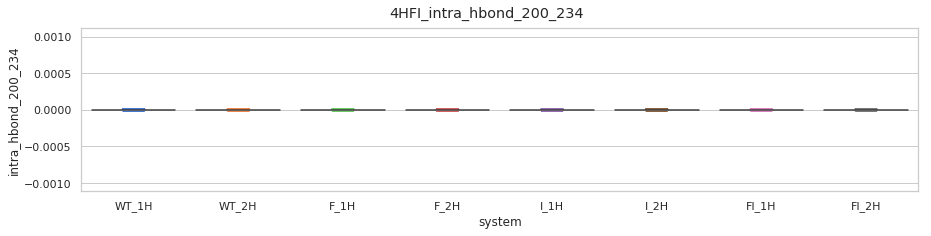

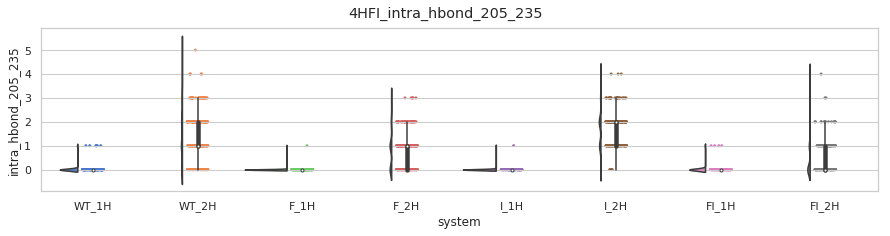

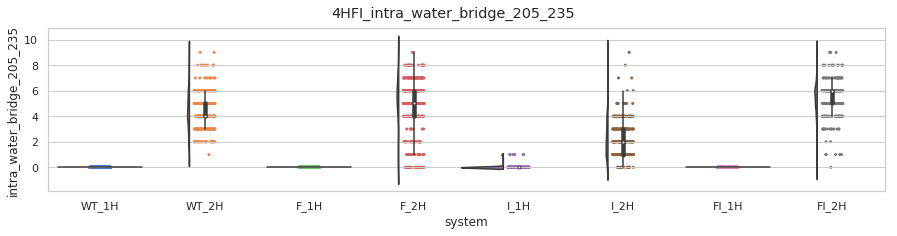

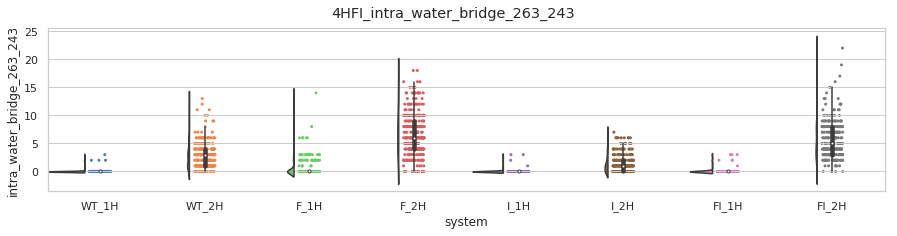

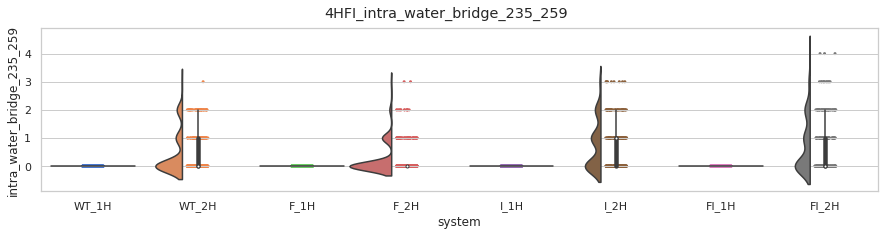

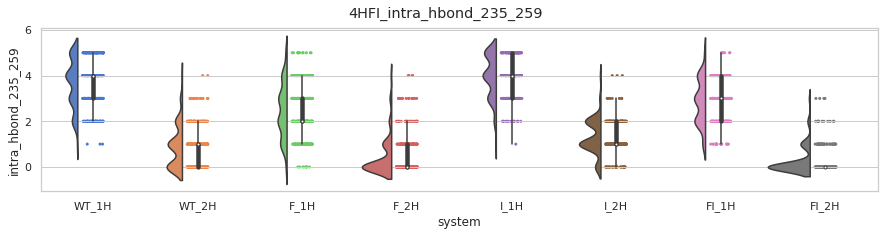

In [14]:
for feature in md_data_235.columns[11:-2]:
    fig, ax = plt.subplots(figsize=(15, 3))
    fig.suptitle('4HFI_' + feature)
    pt.half_violinplot(x='system',y=feature,data=md_data_235,palette="muted", split=False)
    sns.stripplot(x='system', y=feature, data=md_data_235, palette="muted",
       edgecolor = "white",size = 3, jitter = 1, zorder = 0)
#    group = md_data_235.groupby(['system'],sort=False)[feature]
#    mean = group.mean()
#    errors = group.sem()
#    mean.plot.bar(yerr=errors,ax=ax)
    ax.set_xticklabels(['WT_1H','WT_2H','F_1H','F_2H','I_1H','I_2H','FI_1H','FI_2H'])
